In [ ]:
import pickle as pkl
import numpy as np


In [2]:
egovlp_ds_path = "/dais/fs/scratch/dduka/databases/ego4d/ego4d_train.pkl"
nlq_ds_path = "/dais/fs/scratch/dduka/databases/ego4d/nlq/ego4d_train_nlq.pkl"

In [3]:
egovlp_segment_length = []
nlq_segment_length = []

for sample in pkl.load(open(egovlp_ds_path, "rb")):
    egovlp_segment_length.append(sample[2] - sample[1])

for sample in pkl.load(open(nlq_ds_path, "rb")):
    nlq_segment_length.append(sample[2] - sample[1])

In [32]:
egovlp_segment_length = np.array(egovlp_segment_length)
nlq_segment_length = np.array(nlq_segment_length)

Dataset 1: Mean=1.00, Std=1.01
Dataset 2: Mean=4.10, Std=4.06


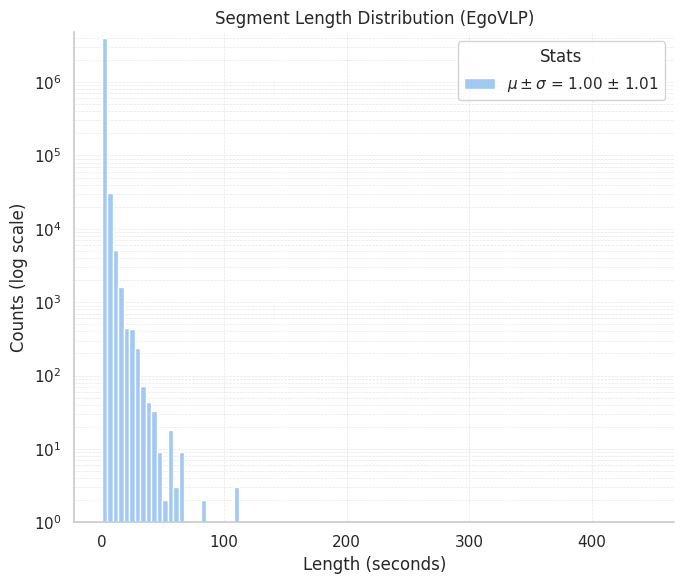

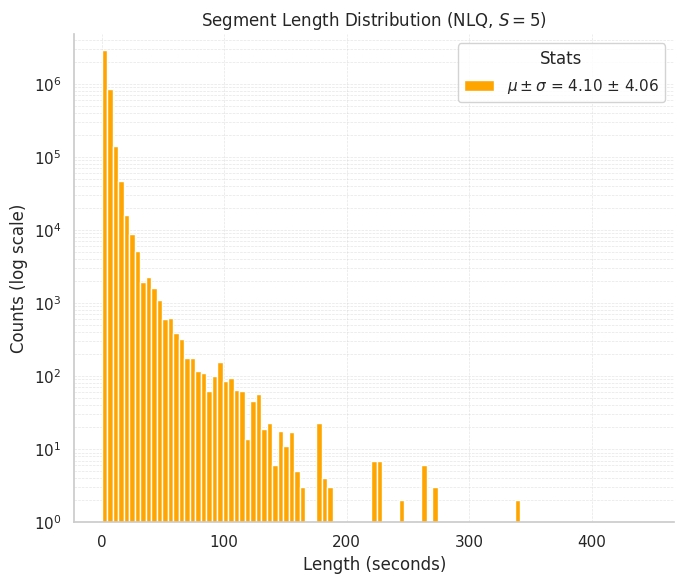

In [48]:
import numpy as np
import matplotlib.pyplot as plt

def _coerce_array(x):
    arr = np.asarray(x, dtype=float).ravel()
    arr = arr[np.isfinite(arr)]
    if arr.size == 0:
        raise ValueError("Array is empty or has no finite values.")
    return arr

# Expect these to exist in your session:
#   egovlp_segment_length
#   nlq_segment_length
data1 = _coerce_array(egovlp_segment_length)
data2 = _coerce_array(nlq_segment_length)

# Shared bin edges across both datasets
xmin = float(min(np.min(data1), np.min(data2)))
xmax = float(max(np.max(data1), np.max(data2)))
if np.isclose(xmin, xmax):
    pad = 0.5 if xmax == 0 else abs(xmax) * 0.05
    xmin, xmax = xmax - pad, xmax + pad
bins = np.linspace(xmin, xmax, 100)

# Stats
mean1, std1 = float(np.mean(data1)), float(np.std(data1))
mean2, std2 = float(np.mean(data2)), float(np.std(data2))

# Precompute counts to sync y-limits on log scale
counts1, _ = np.histogram(data1, bins=bins)
counts2, _ = np.histogram(data2, bins=bins)
ymax = max(int(counts1.max()), int(counts2.max()), 1)

def _style(ax):
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.5)

# --- Figure 1: EgoVLP ---
fig1, ax1 = plt.subplots(figsize=(7, 6))
ax1.hist(
    data1, bins=bins, log=True,
    label=rf"$\mu \pm \sigma$ = {mean1:.2f} ± {std1:.2f}"
)

ax1.set_ylim(1, ymax * 1.2)
ax1.set_title("Segment Length Distribution (EgoVLP)")
ax1.set_xlabel("Length (seconds)")
ax1.set_ylabel("Counts (log scale)")
_style(ax1)

leg1 = ax1.legend(
    loc="upper right", title="Stats", fancybox=True, framealpha=0.85,
    borderaxespad=0.6, labelspacing=0.6
)
for t in leg1.get_texts():
    t.set_ha("left")

fig1.tight_layout()
fig1.savefig("egovlp_segment_lengths_logy.pdf", dpi=300)

# --- Figure 2: NLQ ---
fig2, ax2 = plt.subplots(figsize=(7, 6))
ax2.hist(
    data2, bins=bins, log=True, color='orange',
    label=rf"$\mu \pm \sigma$ = {mean2:.2f} ± {std2:.2f}"
)
ax2.set_ylim(1, ymax * 1.2)
ax2.set_title(r"Segment Length Distribution (NLQ, $S = 5$)")
ax2.set_xlabel("Length (seconds)")
ax2.set_ylabel("Counts (log scale)")
_style(ax2)

leg2 = ax2.legend(
    loc="upper right", title="Stats", fancybox=True, framealpha=0.85,
    borderaxespad=0.6, labelspacing=0.6
)
for t in leg2.get_texts():
    t.set_ha("left")

fig2.tight_layout()
fig2.savefig("nlq_segment_lengths_logy.pdf", dpi=300)

print(f"Dataset 1: Mean={mean1:.2f}, Std={std1:.2f}")
print(f"Dataset 2: Mean={mean2:.2f}, Std={std2:.2f}")
